In [ ]:
!pip install pyTsetlinMachine

  Preparing metadata (setup.py) ... done
  Created wheel for pyTsetlinMachine: filename=pyTsetlinMachine-0.6.6-cp310-cp310-linux_x86_64.whl size=59491 sha256=01543d7d4c7a61f1c99d2d6948e232a8f254c3441aa742757b5465e82bf6657e
  Stored in directory: /root/.cache/pip/wheels/b0/b0/c5/07c4cb8bb93c5325bdc2c2a070b565f54df717d5d11f0c6802
Successfully built pyTsetlinMachine


In [ ]:
# !pip uninstall scikit-learn --yes
# !pip install scikit-learn==1.2.2
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# !pip install pretty-confusion-matrix
# from pretty_confusion_matrix import pp_matrix
# from pretty_confusion_matrix import pp_matrix_from_data

In [ ]:
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from pyTsetlinMachine.tools import Binarizer
from keras.utils import to_categorical
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

from pylab import *
import bisect
import pandas as pd

import os
import pickle
import copy

In [ ]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target

In [ ]:
X = np.loadtxt('drive/MyDrive/biomarkers/bmarkers_x.csv', delimiter=',')
Y = np.loadtxt('drive/MyDrive/biomarkers/bmarkers_y.csv', delimiter=',')
print(X.shape, Y.shape)

(83, 49) (83,)


In [ ]:
uv = np.unique(X[:,0])[1:]
print(uv.min(), uv.max(), uv)

7.691 28.11 [ 7.691  7.729  7.76   8.196  8.219  8.571  8.597  8.598  8.618  8.671
  8.726  8.734  8.878  8.888  8.95   9.     9.029  9.042  9.173  9.268
  9.295  9.333  9.397  9.405  9.423  9.436  9.465  9.504  9.567  9.606
  9.667  9.668  9.676  9.683  9.72   9.731  9.738  9.742  9.755  9.777
  9.787  9.847  9.876  9.904 10.03  10.05  10.08  10.16  10.17  10.18
 10.2   10.25  10.26  10.29  10.32  10.44  10.48  10.49  10.51  10.57
 10.6   10.65  10.66  10.71  10.75  10.8   10.82  10.86  10.88  10.9
 10.91  10.94  10.95  10.96  10.97  11.04  11.06  11.08  11.13  11.14
 11.15  11.16  11.2   11.22  11.25  11.26  11.27  11.28  11.29  11.3
 11.31  11.32  11.33  11.34  11.36  11.37  11.41  11.42  11.43  11.45
 11.46  11.47  11.49  11.5   11.51  11.52  11.54  11.57  11.6   11.61
 11.62  11.63  11.64  11.66  11.67  11.68  11.69  11.7   11.71  11.74
 11.75  11.76  11.8   11.81  11.84  11.85  11.87  11.89  11.9   11.93
 11.94  11.95  11.99  12.    12.03  12.04  12.05  12.06  12.07  12.1
 12.16 

In [ ]:
b = Binarizer(max_bits_per_feature = 1)
b.fit(X)
X_transformed = b.transform(X)

In [ ]:
b = Booleanizer(mdn = False, one_hot_encoding = True, max_bits_per_feature = 2)
b.fit(X)
X_transformed = b.transform(X)

In [ ]:
print(X_transformed.shape)
print(b.bins_list[4])

(83, 98)
[443.0896067]


In [ ]:
np.unique(X[:,0])[1:]

array([ 7.691,  7.729,  7.76 ,  8.196,  8.219,  8.571,  8.597,  8.598,
        8.618,  8.671,  8.726,  8.734,  8.878,  8.888,  8.95 ,  9.   ,
        9.029,  9.042,  9.173,  9.268,  9.295,  9.333,  9.397,  9.405,
        9.423,  9.436,  9.465,  9.504,  9.567,  9.606,  9.667,  9.668,
        9.676,  9.683,  9.72 ,  9.731,  9.738,  9.742,  9.755,  9.777,
        9.787,  9.847,  9.876,  9.904, 10.03 , 10.05 , 10.08 , 10.16 ,
       10.17 , 10.18 , 10.2  , 10.25 , 10.26 , 10.29 , 10.32 , 10.44 ,
       10.48 , 10.49 , 10.51 , 10.57 , 10.6  , 10.65 , 10.66 , 10.71 ,
       10.75 , 10.8  , 10.82 , 10.86 , 10.88 , 10.9  , 10.91 , 10.94 ,
       10.95 , 10.96 , 10.97 , 11.04 , 11.06 , 11.08 , 11.13 , 11.14 ,
       11.15 , 11.16 , 11.2  , 11.22 , 11.25 , 11.26 , 11.27 , 11.28 ,
       11.29 , 11.3  , 11.31 , 11.32 , 11.33 , 11.34 , 11.36 , 11.37 ,
       11.41 , 11.42 , 11.43 , 11.45 , 11.46 , 11.47 , 11.49 , 11.5  ,
       11.51 , 11.52 , 11.54 , 11.57 , 11.6  , 11.61 , 11.62 , 11.63 ,
      

In [ ]:
np.unique(X[:,0])

array([ 6.981,  7.691,  7.729,  7.76 ,  8.196,  8.219,  8.571,  8.597,
        8.598,  8.618,  8.671,  8.726,  8.734,  8.878,  8.888,  8.95 ,
        9.   ,  9.029,  9.042,  9.173,  9.268,  9.295,  9.333,  9.397,
        9.405,  9.423,  9.436,  9.465,  9.504,  9.567,  9.606,  9.667,
        9.668,  9.676,  9.683,  9.72 ,  9.731,  9.738,  9.742,  9.755,
        9.777,  9.787,  9.847,  9.876,  9.904, 10.03 , 10.05 , 10.08 ,
       10.16 , 10.17 , 10.18 , 10.2  , 10.25 , 10.26 , 10.29 , 10.32 ,
       10.44 , 10.48 , 10.49 , 10.51 , 10.57 , 10.6  , 10.65 , 10.66 ,
       10.71 , 10.75 , 10.8  , 10.82 , 10.86 , 10.88 , 10.9  , 10.91 ,
       10.94 , 10.95 , 10.96 , 10.97 , 11.04 , 11.06 , 11.08 , 11.13 ,
       11.14 , 11.15 , 11.16 , 11.2  , 11.22 , 11.25 , 11.26 , 11.27 ,
       11.28 , 11.29 , 11.3  , 11.31 , 11.32 , 11.33 , 11.34 , 11.36 ,
       11.37 , 11.41 , 11.42 , 11.43 , 11.45 , 11.46 , 11.47 , 11.49 ,
       11.5  , 11.51 , 11.52 , 11.54 , 11.57 , 11.6  , 11.61 , 11.62 ,
      

In [ ]:
max_bits_per_feature = 1
uv = np.unique(X[:,0])
bin_list = np.linspace(uv.min(), uv.max(), max_bits_per_feature + 2)[1:-1]

In [ ]:
a = 18
indx = bisect.bisect_right(bin_list, a)
print(indx)

1


In [ ]:
np.median(X[:,4])

833.0

In [ ]:

q, bins = pd.qcut(X[:,4], q=2, retbins=True)#, precision=0)#, duplicates='drop')
bins = bins[1:-1]
bins


array([833.])

In [ ]:
qc.categories

IntervalIndex([(6.9799999999999995, 12.25], (12.25, 14.773], (14.773, 28.11]], dtype='interval[float64, right]')

In [ ]:
ceil(np.log2(5)).astype(int)

3

In [ ]:
class Booleanizer:
  def __init__(self, mdn = False, encoding = 'one_hot', max_bits_per_feature = 1, equal_bins = True):
    #encoding = {'one_hot', 'binary', 'termometer'}
    self.mdn = mdn
    self.encoding = encoding
    self.max_bits_per_feature = max_bits_per_feature
    self.equal_bins = equal_bins
    return

  def fit(self, X):
    self.number_of_features = 0
    self.bins_list = []
    self.bits_per_feature = []
    bins_no = 0
    for i in range(X.shape[1]):
      uv = np.unique(X[:,i])
      if self.encoding == 'one_hot' or self.encoding == 'termometer':
        if uv.size < self.max_bits_per_feature and self.equal_bins == False:
          bins_no = uv.size
        else:
          bins_no = self.max_bits_per_feature
        self.number_of_features += bins_no
        self.bits_per_feature.append(bins_no)
      else:
        if uv.size < 2 ** self.max_bits_per_feature and self.equal_bins == False:
          bins_no = uv.size
          bits_no = ceil(np.log2(bins_no)).astype(int)
          self.number_of_features += bits_no
          self.bits_per_feature.append(bits_no)
        else:
          bins_no = 2 ** self.max_bits_per_feature
          self.number_of_features += self.max_bits_per_feature
          self.bits_per_feature.append(self.max_bits_per_feature)

      if self.mdn == True:
        # if bins_no == 2:
        #   bins = np.array(np.median(X[:,i]))
        # else:
          q, bins = pd.qcut(X[:,i], q=bins_no, retbins=True, duplicates='raise') #duplicates='drop'
          #bins = bins[1:-1]
      else:
        bins = np.linspace(X[:,i].min(), X[:,i].max(), bins_no + 1) #[1:-1]
        #print(bins)

      self.bins_list.append(bins)
    #self.bins_list = np.array(self.bins_list)
    return

  def transform(self, X):
    X_indx = np.zeros((X.shape[0], X.shape[1]), int64)
    for i in range(X.shape[1]):
      for j in range(X.shape[0]):
        X_indx[j,i] = bisect.bisect_right(self.bins_list[i][1:-1], X[j,i]) #bisect_left

    if (self.encoding == 'binary'):
#      X_out = np.array((((X_indx[:, 0, None] & (1 << np.arange(self.bits_per_feature[i]))[::-1])) > 0).astype(int))
      X_out = np.array((((X_indx[:, 0, None] & (1 << np.arange(self.bits_per_feature[i]))[::-1])) > 0).astype(int))
      for i in range(1, X.shape[1]):
#        X_out = np.concatenate((X_out, np.array((((X_indx[:, i, None] & (1 << np.arange(self.bits_per_feature[i]))[::-1])) > 0).astype(int))), axis=1)
        X_out = np.concatenate((X_out, np.array((((X_indx[:, i, None] & (1 << np.arange(self.bits_per_feature[i])))) > 0).astype(int))), axis=1)
        #print(i, X_out.shape)
    elif (self.encoding == 'one_hot'):
#      X_out = np.fliplr(np.array(to_categorical(X_indx[:, 0], num_classes=self.bits_per_feature[i])).astype(int))
      X_out = np.array(to_categorical(X_indx[:, 0], num_classes=self.bits_per_feature[i]).astype(int))
      #print(i, X_out.shape)
      for i in range(1, X.shape[1]):
#        X_out = np.concatenate((X_out, np.fliplr(np.array(to_categorical(X_indx[:, i], num_classes=self.bits_per_feature[i])).astype(int))), axis=1)
        X_out = np.concatenate((X_out, np.array(to_categorical(X_indx[:, i], num_classes=self.bits_per_feature[i])).astype(int)), axis=1)
        #print(i, X_out.shape)
    else:
      X_out = np.zeros((X.shape[0], self.number_of_features))
      pos = 0
      #print(X.shape[1], self.bits_per_feature[i])
      for i in range(X.shape[1]):
        for j in range(self.bits_per_feature[i]):
          X_out[:,pos] = (X[:,i] >= self.bins_list[i][j]) #self.unique_values[i][j])
          #print(X[:,i], self.bins_list[:,0:-1][i,j])
          pos += 1

    # pos = 0
    # for i in range(X.shape[1]):
    #   for j in range(self.bins_list[i].size):
    #     X_transformed[:,pos] = (X[:,i] >= self.bins_list[i][j])
    #     pos += 1

    return X_out

In [ ]:
# #Courier, Courier New, Lucida Console, Monaco, and Consolas
# [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# from matplotlib import rcParams
# rcParams['font.family'] = 'Courier New'

In [ ]:
def tm_clause_display(tm, x_shape, y_shape, polarity = 0, y = 0, clause_lable = [], bn_range = []):
  from matplotlib import rcParams
  rcParams['font.family'] = 'Liberation Mono' #DejaVu Sans Mono
  l = np.zeros((tm.number_of_clauses//2, tm.number_of_features//2), dtype=np.uint32)
  l_0 = np.zeros((tm.number_of_features//2), dtype=np.uint32)
  l_1 = np.zeros((tm.number_of_features//2), dtype=np.uint32)
  for i in range(polarity, tm.number_of_clauses, 2):
    for j in range(tm.number_of_features):
      if tm.ta_action(y, i, j) == 1: # symbol's class
        if j < tm.number_of_features//2:
          l[i//2, j] = 1
          l_1[j] += 1
        else:
          l[i//2, j-tm.number_of_features//2] = 2
          l_0[j-tm.number_of_features//2] += 1

  # palette = np.array([[  255,   255,   255],   # white
  #                   [  0, 204,   0],   # dark green
  #                   [  204, 0,  0]])   # dark red
    palette = np.array([[  255,   255,   255],   # white
                    [  10, 120,   50],   # dark green
                    [  190, 15,  10]])   # dark red

  fig = plt.figure(figsize=(14,10))
  bm = ('IFNg', 'IL1b', 'IL2', 'IL4', 'IL6', 'IL10', 'IL12p70', 'IL13', 'TNFa', 'GMCSF', 'IL1a', 'IL5', 'IL7', 'IL12/IL23p40', 'IL15', 'IL16', 'IL17A', 'TNFb', 'VEGF', 'Eotaxin', 'MIP1b', 'Eotaxin3', 'TARC', 'IP10', 'MIP1a', 'MCP1', 'MDC', 'MCP4', 'IL6R', 'IL18', 'IL22', 'TGFb', 'IL8', 'MMPsubstr', 'HNEsubstr', 'Zym', 'MMP8 Total', 'HNE', 'Calprotectin', 'SPD', 'TotalCellCount', 'CD3+live(%)', 'CD14+live(%)', 'CD15+live(%)', 'CD4/CD8', 'CD4/CD3(%)', 'CD8/CD3(%)', 'g9T/CD3(%)', 'd2T/CD3(%)')
  for i in range(0,tm.number_of_clauses//2):
    ax = plt.subplot(tm.number_of_clauses//20,10,i+1)
#    plt.xticks([0, 1, 2, 3])
    if i==0:
      plt.yticks(np.arange(len(bm)), bm)
    #plt.yticks(np.arange(0, y_shape, 1))
    elif i==tm.number_of_clauses//2-1 and bn_range != []:
      ax.yaxis.tick_right()
      plt.yticks(np.arange(len(bn_range)), bn_range)
    else:
      plt.yticks([])
    plt.yticks(np.arange(0.5, y_shape-0.5, 1), minor = True)
    plt.xticks(np.arange(0, x_shape+1, 1))
    plt.xticks(np.arange(0.5, x_shape+0.5, 1), minor = True)
    plt.tick_params(which='minor', bottom=False, left=False, right=False)
    plt.grid(which='minor')
#    plt.grid(True)
    if clause_lable != []:
      plt.xlabel(clause_lable[i])

    #RGB = palette[l[i].reshape(int(np.sqrt(tm.number_of_features//2)),int(np.sqrt(tm.number_of_features//2)))]
    RGB = palette[l[i].reshape(y_shape, x_shape)]
    plt.imshow(RGB)

  # filename = "class-%d_polarity-%d_%d.png" % (y, polarity, k)
  # fig.savefig(filename)
  # plt.close()


  l_0 = l_0 / max(l_0) * 255
  l_1 = l_1 / max(l_1) * 255
  fig = plt.figure(figsize=(16.5, 3))
  ax = plt.subplot(2,1,1)
  ax.xaxis.tick_top()
  plt.xticks(np.arange(len(bm)), bm, rotation=90)
  plt.yticks(np.arange(0.5, x_shape-0.5, 1), minor = True)
  plt.yticks(np.arange(0, x_shape+1, 1))
  plt.xticks(np.arange(0.5, y_shape-0.5, 1), minor = True)
  plt.tick_params(which='minor', bottom=False, left=False, right=False)
  plt.grid(which='minor')
  plt.imshow(l_1.reshape(y_shape, x_shape).transpose(), cmap=matplotlib.colormaps.get_cmap('BuGn')) #viridis  magma
  plt.subplot(2,1,2)
  plt.xticks(np.arange(len(bn_range)), bn_range, rotation=90)
  plt.yticks(np.arange(0.5, x_shape-0.5, 1), minor = True)
  plt.yticks(np.arange(0, x_shape+1, 1))
  plt.xticks(np.arange(0.5, y_shape-0.5, 1), minor = True)
  plt.tick_params(which='minor', bottom=False, left=False, right=False)
  plt.grid(which='minor')
  plt.imshow(l_0.reshape(y_shape, x_shape).transpose(), cmap=matplotlib.colormaps.get_cmap('OrRd'))


  # # filename = "avg-not-X_class-%d_polarity-%d_%d.png" % (y, polarity, k)
  # # fig.savefig(filename)
  # # plt.close()

  # fig = plt.figure(figsize=(6, 6))
  # plt.imshow(l_1.reshape(14, 14), cmap=matplotlib.colormaps.get_cmap('BuGn'))
  # # filename = "avg-X_class-%d_polarity-%d_%d.png" % (y, polarity, k)
  # # fig.savefig(filename)
  # # plt.close()

In [ ]:
def clause_score_average(X, Y, tm):
  clause_score = np.zeros((tm.number_of_classes, 2, tm.number_of_clauses), dtype=float)
  #the second dimension is: 0 - True Positives (TP), 1 - True Negatives (TN)
  count_class = np.zeros((tm.number_of_classes), dtype=np.uint32)
  clause_output = tm.transform(X, inverted=False)
  for i in tqdm(range(X.shape[0])):
    count_class[Y[i]] += 1
    for j in range(tm.number_of_classes):
      if j == Y[i]:
        clause_score[j, 0] += clause_output[i][j*tm.number_of_clauses:j*tm.number_of_clauses+tm.number_of_clauses]
      else:
        clause_score[j, 1] += clause_output[i][j*tm.number_of_clauses:j*tm.number_of_clauses+tm.number_of_clauses]
  for i in range(tm.number_of_classes):
    clause_score[i, 0] /= count_class[i]
    clause_score[i, 1] /= X.shape[0] - count_class[i]
  return clause_score

In [ ]:
# breast_cancer = datasets.load_breast_cancer()
# X = breast_cancer.data
# Y = breast_cancer.target
X_tr, X_te, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y)
print(X_tr.shape)

(66, 49)


In [ ]:
# b = Binarizer(max_bits_per_feature = 1)
# b.fit(X)
# X_transformed = b.transform(X)

In [ ]:
#b = Booleanizer(mdn = True, one_hot_encoding = True, max_bits_per_feature = 4)
b = Binarizer(max_bits_per_feature = 4)
b.fit(X_tr)
X_train = b.transform(X_tr)
b.fit(X_te)
X_test = b.transform(X_te)

# 3-fold stratified cross-validation

In [ ]:
X = np.loadtxt('drive/MyDrive/biomarkers/bmarkers_x_posstrnstr.csv', delimiter=',')
Y = np.loadtxt('drive/MyDrive/biomarkers/bmarkers_y_posstrnstr.csv', delimiter=',').astype(int)
# bmarkers_y.csv bmarkers_y_nogrowth.csv bmarkers_y_nogrnegpos.csv bmarkers_y_nogrnegstrnonstr.csv
# bmarkers_y_neg.csv bmarkers_y_pos.csv bmarkers_y_posstr.csv bmarkers_y_posnstr.csv
print(X.shape, Y.shape)
bl = Booleanizer(mdn = False, encoding = 'one_hot', max_bits_per_feature = 4)
bl.fit(X)
X_bl = bl.transform(X)

bn = Binarizer(max_bits_per_feature = 2)
bn.fit(X)
X_bn = bn.transform(X)

(47, 49) (47,)


In [ ]:
IL6 = np.loadtxt('IL-6.csv', delimiter=',')
print(IL6.shape)
print(IL6)
bn = Binarizer(max_bits_per_feature = 3)
bn.fit(IL6)
IL6_bn = bn.transform(IL6)
print(bn.unique_values)
print(IL6_bn)

(83, 2)
[[  1.         833.        ]
 [  2.         833.        ]
 [  3.         453.7332014 ]
 [  4.         186.5858057 ]
 [  5.         833.        ]
 [  6.         833.        ]
 [  7.         833.        ]
 [  8.         833.        ]
 [  9.          96.43132618]
 [ 10.         190.008396  ]
 [ 11.         833.        ]
 [ 12.         833.        ]
 [ 13.         833.        ]
 [ 14.         833.        ]
 [ 15.         833.        ]
 [ 16.         833.        ]
 [ 17.         833.        ]
 [ 18.         833.        ]
 [ 19.         833.        ]
 [ 20.         833.        ]
 [ 21.         833.        ]
 [ 22.         272.311958  ]
 [ 23.         833.        ]
 [ 24.         833.        ]
 [ 25.         833.        ]
 [ 26.         833.        ]
 [ 27.         833.        ]
 [ 28.         833.        ]
 [ 29.         833.        ]
 [ 30.          52.17921341]
 [ 31.         833.        ]
 [ 32.         271.238502  ]
 [ 33.         833.        ]
 [ 34.         833.        ]
 [ 35.

In [ ]:
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
print(arr[:, 1:-1][0])
print(bl.bins_list)
print(np.array(bl.bins_list)[:, 1:-1])
print(bl.bits_per_feature)

[2 3 4]
[[  1.          42.          83.        ]
 [ 52.17921341 443.0896067  834.        ]]
[[ 42.       ]
 [443.0896067]]
[2, 2]


In [ ]:
bl = Booleanizer(mdn = False, encoding = 'termometer', max_bits_per_feature = 4)
bl.fit(IL6)
IL6_bl = bl.transform(IL6)
print('------------------------')
print(bl.bins_list)
print(IL6_bl)
#[array([21.5, 42. , 62.5]), array([247.63441006, 443.0896067 , 638.54480335])]

------------------------
[array([ 1. , 21.5, 42. , 62.5, 83. ]), array([ 52.17921341, 247.63441006, 443.0896067 , 638.54480335,
       834.        ])]
[[1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0

In [ ]:
print(X_bl.shape, X_bn.shape)
i = 9
j = 4
print(X[i, j], X_bl[i], X_bn[i])
print(bl.bins_list[j], bn.unique_values[j])

NameError: name 'X_bl' is not defined

In [ ]:
#print(Y[Y==0].shape, Y[Y==1].shape)
ros = RandomOverSampler()
X, Y = ros.fit_resample(X, Y)
print(X.shape, Y.shape)
print(Y[Y==0].shape, Y[Y==1].shape)


(189, 49) (189,)
(21,) (21,)


# Data balancing by oversampling

In [ ]:
# Y = Y - 2
# X = X[Y>=0]
# Y = Y[Y>=0]

In [ ]:
X = np.loadtxt('drive/MyDrive/biomarkers/bmarkers_x_posnonstrstap.csv', delimiter=',')
Y = np.loadtxt('drive/MyDrive/biomarkers/bmarkers_y_posnonstrstap.csv', delimiter=',').astype(int)
# bmarkers_y.csv bmarkers_y_nogrowth.csv bmarkers_y_nogrnegpos.csv bmarkers_y_nogrnegstrnonstr.csv bmarkers_x_posnonstrstap.csv
# bmarkers_y_neg.csv bmarkers_y_pos.csv bmarkers_y_posstr.csv bmarkers_y_posnstr.csv bmarkers_y_posnonstrstap.csv
# Binary classification:
# - bmarkers_x_posneg.csv - bmarkers_y_posneg.csv

In [ ]:
#bn = Binarizer(max_bits_per_feature = 8)
bn = Booleanizer(mdn = False, encoding = 'one_hot', max_bits_per_feature = 4) #termometer
bn.fit(X)
X_bn = bn.transform(X)

In [ ]:
bn_range = []
for i in range(len(bn.bins_list)):
  bn_range.append(np.array2string(np.array(bn.bins_list[i]), separator=' ', precision=2, formatter={'float_kind': '{:0.1e}'.format}))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_bn, Y, test_size=0.2, random_state=36, stratify=Y)  #, stratify = Y, random_state=36, 41, 49

In [ ]:
ros = RandomOverSampler()
X_train, Y_train = ros.fit_resample(X_train, Y_train)
#X_test, Y_test = ros.fit_resample(X_test, Y_test)

In [ ]:
print(X_bn.shape, X_train.shape, X_test.shape)

(31, 196) (32, 196) (7, 196)


In [ ]:
# # Write TM state
# file_name='drive/MyDrive/biomarkers/tm_posnonstrstap-%d-%d-%d-%d.pkl' % (C, T, s, epoch)
# with open(file_name, 'wb') as handle:
#   pickle.dump(tm_max.get_state(), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# # Read TM state
# tm_name="drive/MyDrive/biomarkers/tm_posnonstrstap-%d-%d-%d-%d.pkl" % (20, 3, 2, 1260)
# if os.path.isfile(tm_name):
#   with open(tm_name,'rb') as pickle_file:
#     state = pickle.load(pickle_file)
#   tm.set_state(state)

In [ ]:
C = 20
T = 3
s = 2
tm = MultiClassTsetlinMachine(C, T, s)         #(20, 3, 1.4)#(50, 5, 3)# (20, 3, 1.8) (20, 4, 3)
tm.fit(X_train, Y_train, epochs=0, incremental=True)
tm_train_results = []
tm_test_results = []

In [ ]:
acc_train_max = 0
acc_test_max = 0
epoch = 0

In [ ]:
for i in tqdm(range(2000)):
  tm.fit(X_train, Y_train, epochs=1, incremental=True)
  y_train_predict = tm.predict(X_train)
  y_test_predict = tm.predict(X_test)

  acc_train = np.array(100*(y_train_predict == Y_train).mean())
  acc_test = np.array(100*(y_test_predict == Y_test).mean())
  tm_train_results = np.append(tm_train_results, acc_train)
  tm_test_results = np.append(tm_test_results, acc_test)
  # if acc_train >= acc_train_max:
  #   if acc_test >= acc_test_max:
  #     acc_test_max = acc_test
  #     acc_train_max = acc_train
  #     tm_max = copy.deepcopy(tm)
  #     epoch = i
  if acc_test >= acc_test_max:
    acc_test_max = acc_test
    acc_train_max = acc_train
    tm_max = copy.deepcopy(tm)
    epoch = i
  if tm_train_results.max() == acc_train:
    y_train_predict_max = y_train_predict
  if tm_test_results.max() == acc_test:
    y_test_predict_max = y_test_predict

100%|██████████| 2000/2000 [00:02<00:00, 679.91it/s]


In [ ]:
print(tm_train_results.max(), tm_test_results.max(), epoch, acc_train_max, acc_test_max)

100.0 100.0 483 100.0 100.0


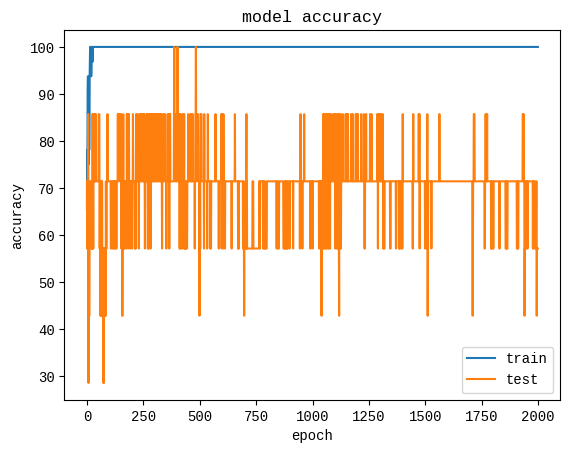

In [ ]:
from matplotlib import pyplot as plt
plt.plot(tm_train_results)
plt.plot(tm_test_results)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
clause_score_av_train = clause_score_average(X_train, Y_train, tm_max)
#clause_score_av_train = clause_score_average(X_test, Y_test, tm_max)

100%|██████████| 32/32 [00:00<00:00, 20296.04it/s]


In [ ]:
for yclass in range(2):
  for polarity in range(2):
    clause_label = []
    if polarity == 0:
      print("Display POSITIVE clauses with accuracy labels (True Positives / False Positives): class=", yclass)
    else:
      print("Display NEGATIVE clauses with accuracy labels (True Negatives / False Negatives): class=", yclass)
    for i in range(tm_max.number_of_clauses//2):
      if polarity == 0:
        clause_label.append(str(round(clause_score_av_train[yclass, 0][polarity::2][i]*100, 2)) + '/' + str(round(clause_score_av_train[yclass, 1][polarity::2][i]*100, 2)))
      else:
        clause_label.append(str(round(clause_score_av_train[yclass, 1][polarity::2][i]*100, 2)) + '/' + str(round(clause_score_av_train[yclass, 0][polarity::2][i]*100, 2)))
    print('yclass/polarity: ', yclass, '/', polarity)
    print(clause_label)

Display POSITIVE clauses with accuracy labels (True Positives / False Positives): class= 0
yclass/polarity:  0 / 0
['31.25/0.0', '100.0/100.0', '12.5/0.0', '25.0/0.0', '18.75/0.0', '18.75/0.0', '43.75/0.0', '12.5/0.0', '12.5/0.0', '100.0/100.0']
Display NEGATIVE clauses with accuracy labels (True Negatives / False Negatives): class= 0
yclass/polarity:  0 / 1
['25.0/0.0', '31.25/0.0', '25.0/0.0', '25.0/12.5', '37.5/0.0', '25.0/6.25', '43.75/0.0', '31.25/0.0', '31.25/0.0', '56.25/0.0']
Display POSITIVE clauses with accuracy labels (True Positives / False Positives): class= 1
yclass/polarity:  1 / 0
['31.25/0.0', '37.5/0.0', '25.0/0.0', '25.0/0.0', '31.25/0.0', '37.5/0.0', '31.25/25.0', '43.75/12.5', '50.0/0.0', '37.5/0.0']
Display NEGATIVE clauses with accuracy labels (True Negatives / False Negatives): class= 1
yclass/polarity:  1 / 1
['25.0/0.0', '25.0/0.0', '31.25/0.0', '18.75/0.0', '25.0/0.0', '43.75/0.0', '37.5/18.75', '31.25/0.0', '31.25/0.0', '12.5/0.0']


In [ ]:
print("Max Train Accuracy: ", tm_train_results.max())
print("Max Test Accuracy:  ", tm_test_results.max())

# print(classification_report(Y_train, y_train_predict_max))
print(classification_report(Y_test, y_test_predict_max))
# tn, fp, fn, tp = confusion_matrix(Y_train, y_train_predict, labels=[0, 1]).ravel()
# print("      TP/FP; TN/FN: ", tp, "/", fp, "; ", tn, "/", fn)

Max Train Accuracy:  100.0
Max Test Accuracy:   70.58823529411765
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.67      0.50      0.57         4
           2       1.00      0.67      0.80         3
           3       0.71      0.83      0.77         6

    accuracy                           0.71        17
   macro avg       0.75      0.69      0.70        17
weighted avg       0.73      0.71      0.70        17



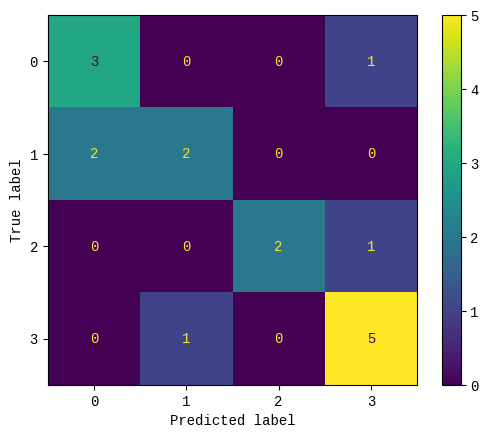

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, y_test_predict_max))

cm_display.plot()
plt.show()

Display POSITIVE clauses with accuracy labels (True Positives / False Positives): class= 0


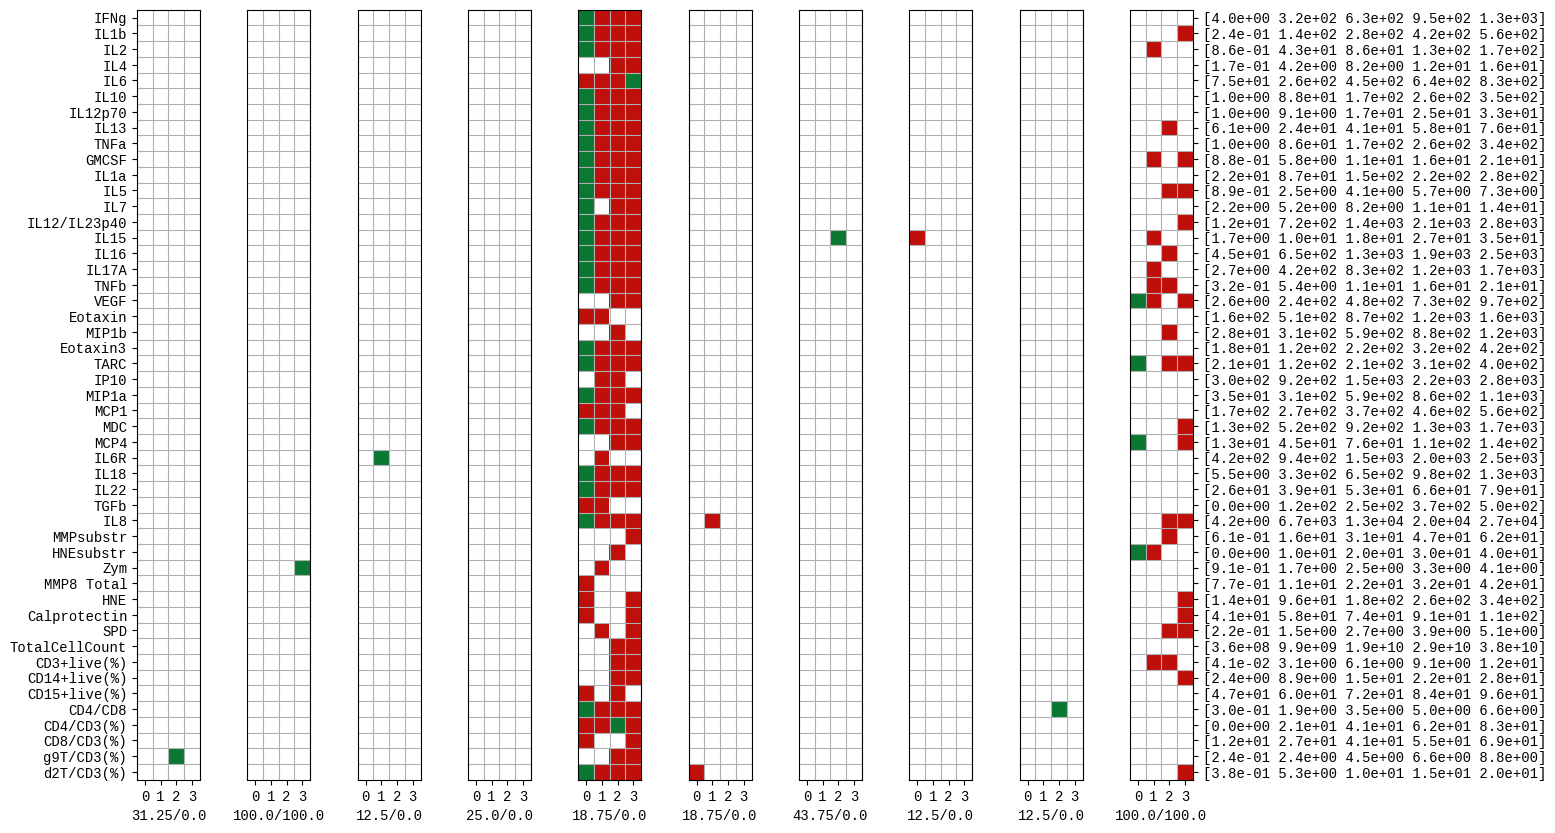

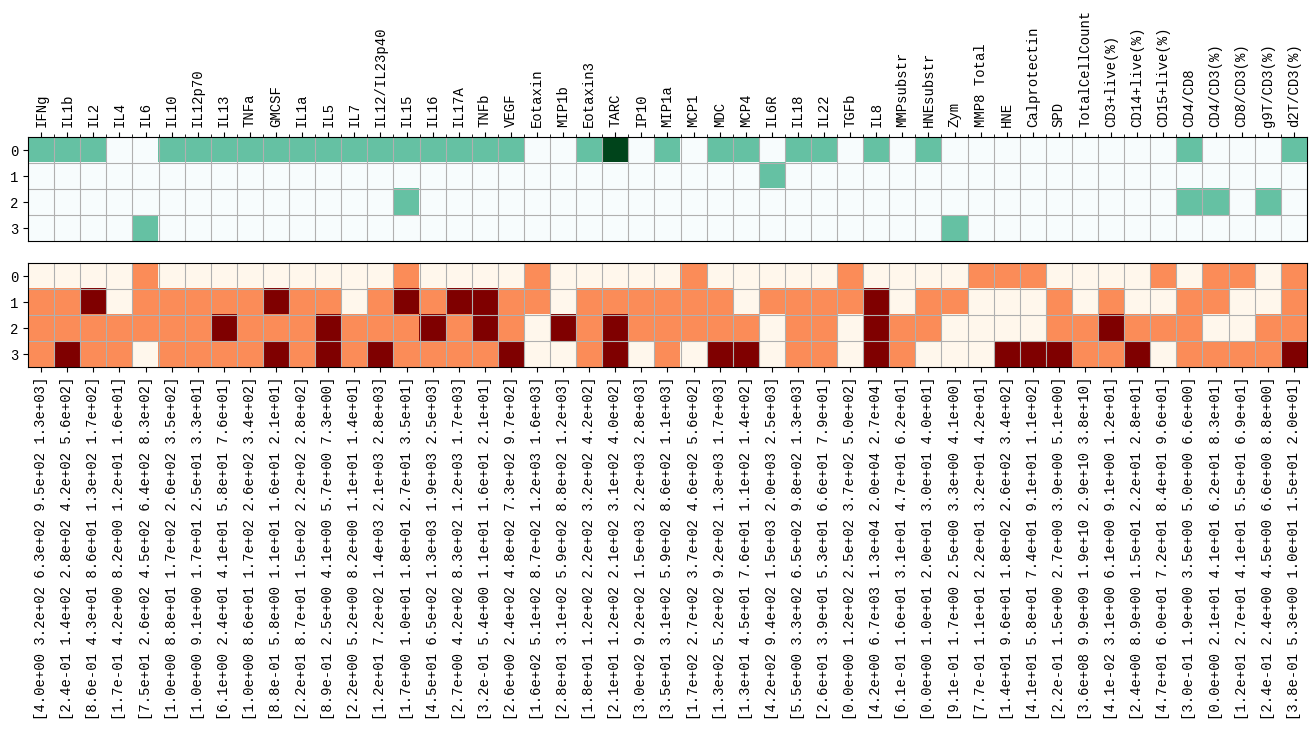

In [ ]:
yclass = 0
polarity = 0
clause_label = []
if polarity == 0:
  print("Display POSITIVE clauses with accuracy labels (True Positives / False Positives): class=", yclass)
else:
  print("Display NEGATIVE clauses with accuracy labels (True Negatives / False Negatives): class=", yclass)
for i in range(tm.number_of_clauses//2):
  if polarity == 0:
    clause_label.append(str(round(clause_score_av_train[yclass, 0][polarity::2][i]*100, 2)) + '/' + str(round(clause_score_av_train[yclass, 1][polarity::2][i]*100, 2)))
  else:
    clause_label.append(str(round(clause_score_av_train[yclass, 1][polarity::2][i]*100, 2)) + '/' + str(round(clause_score_av_train[yclass, 0][polarity::2][i]*100, 2)))
tm_clause_display(tm_max, x_shape = 4, y_shape = 49, polarity = polarity, y = yclass, clause_lable = clause_label, bn_range = bn_range)

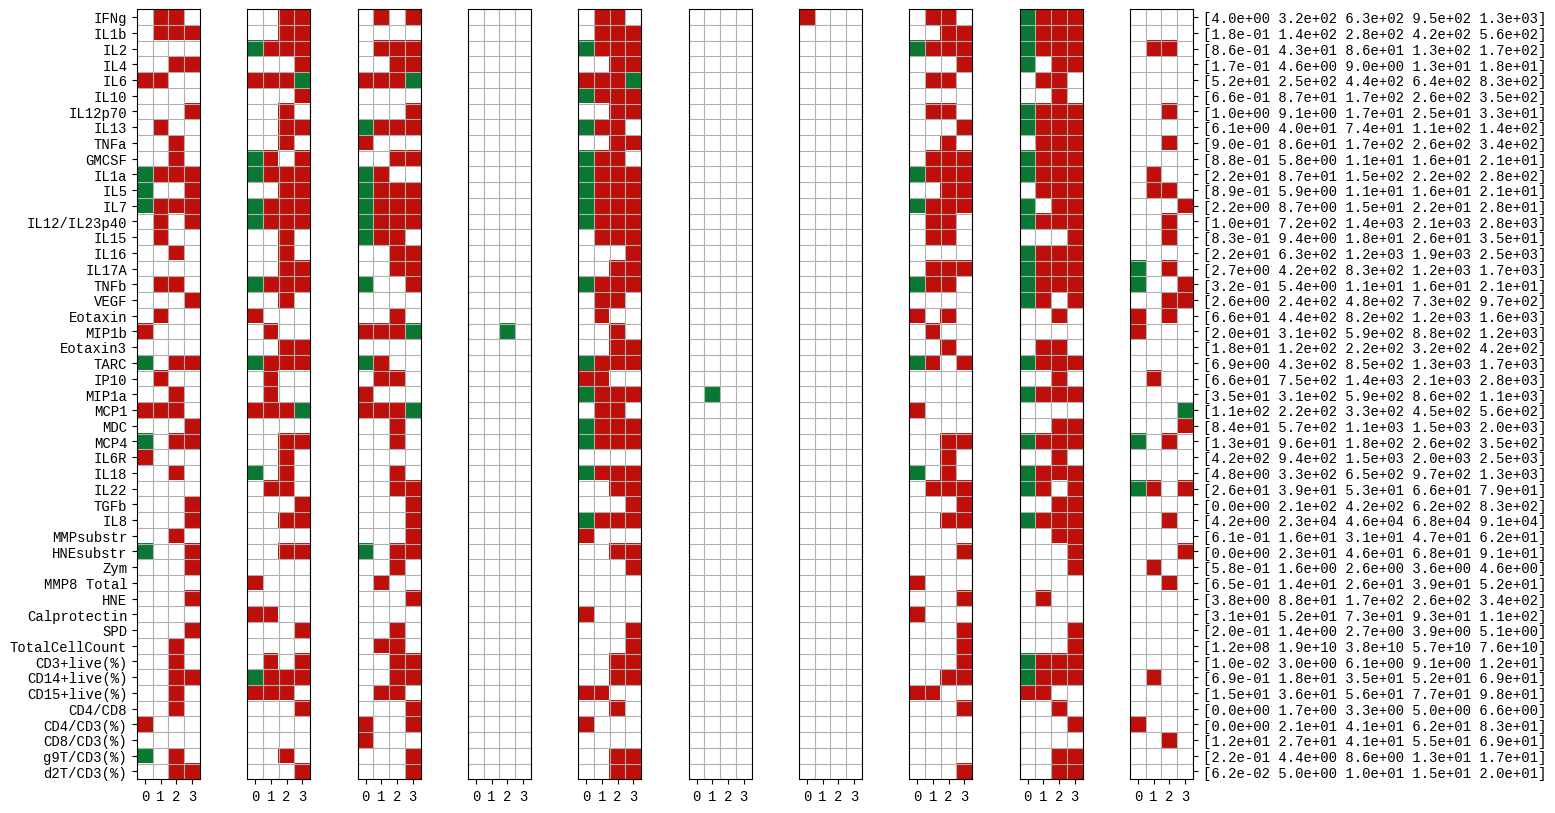

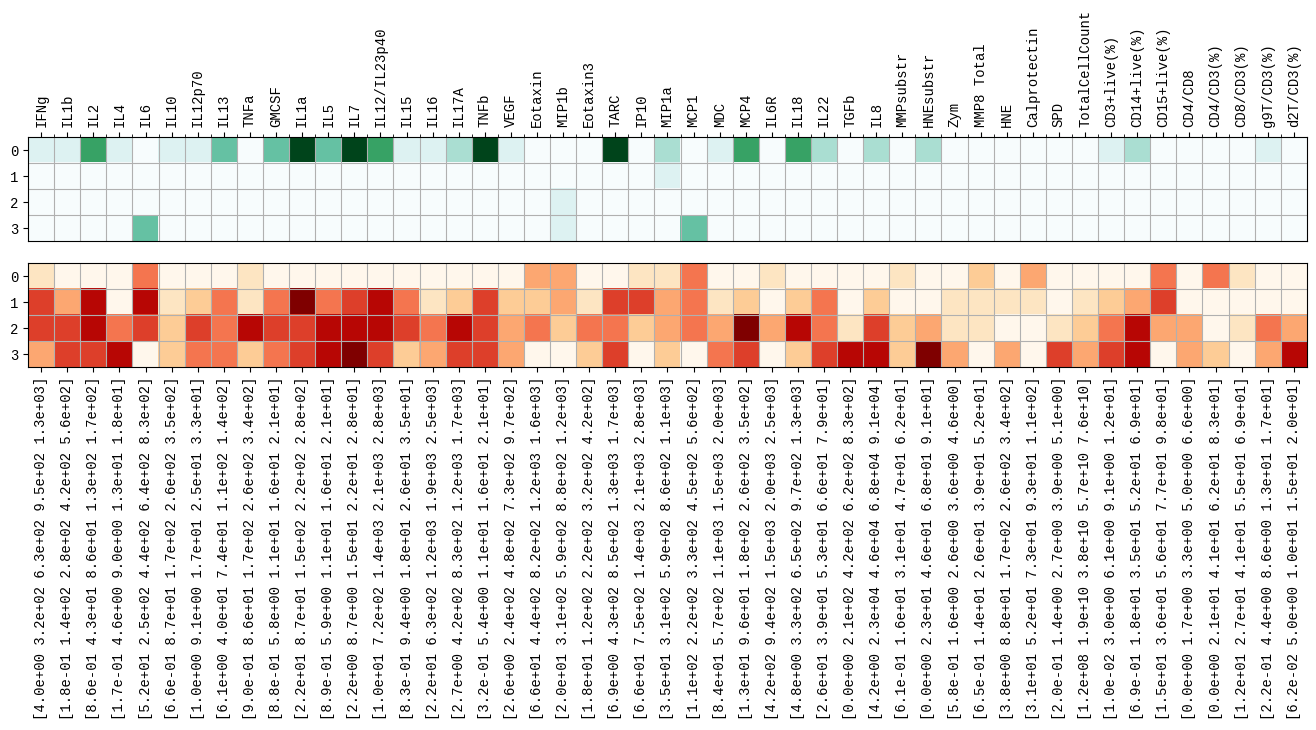

In [ ]:
tm_clause_display(tm_max, x_shape = 4, y_shape = 49, polarity = 1, y = 0, bn_range = bn_range)

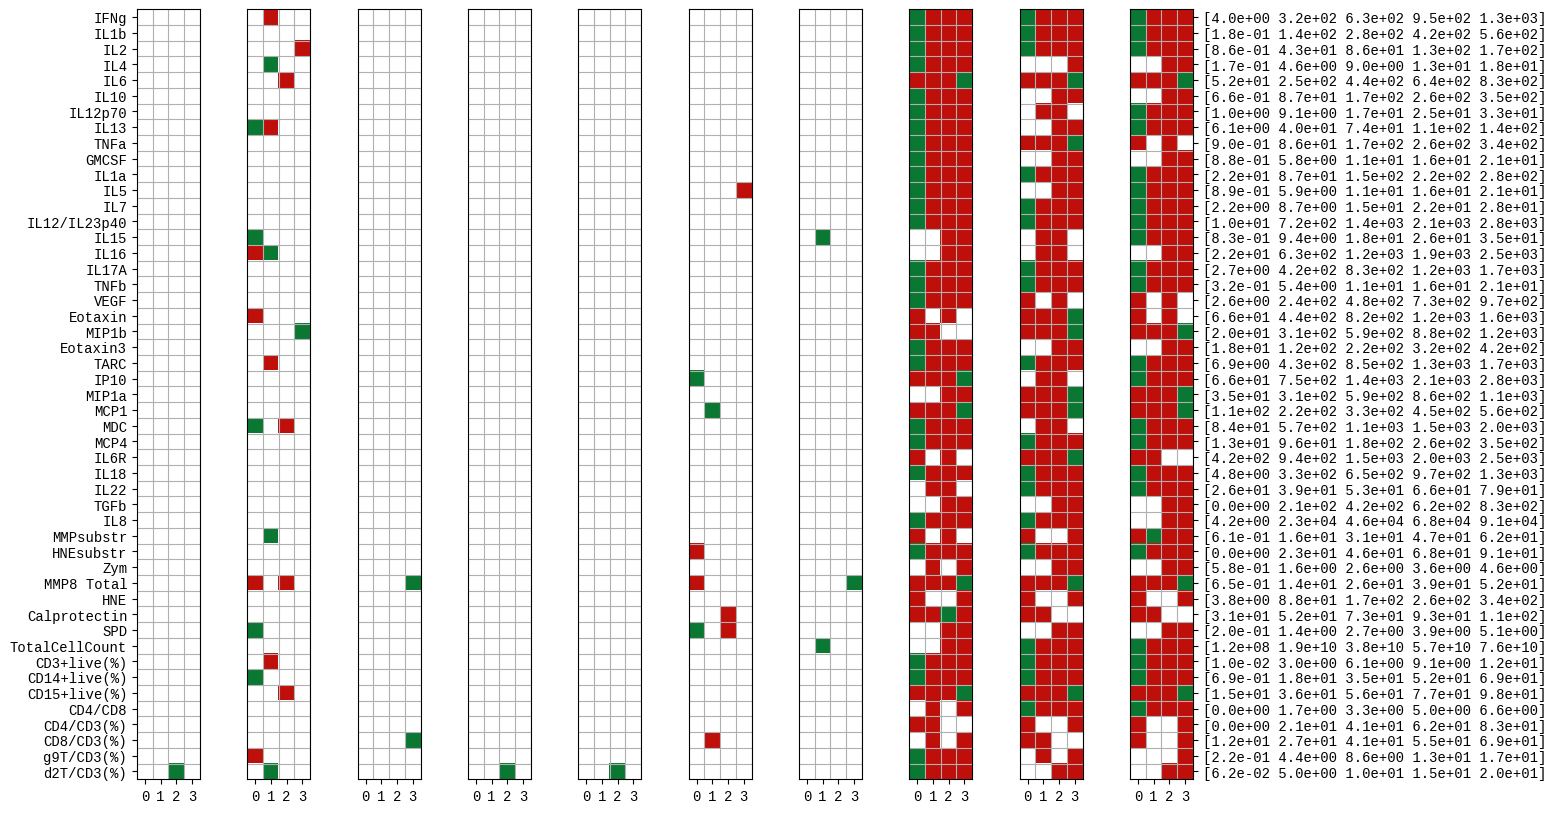

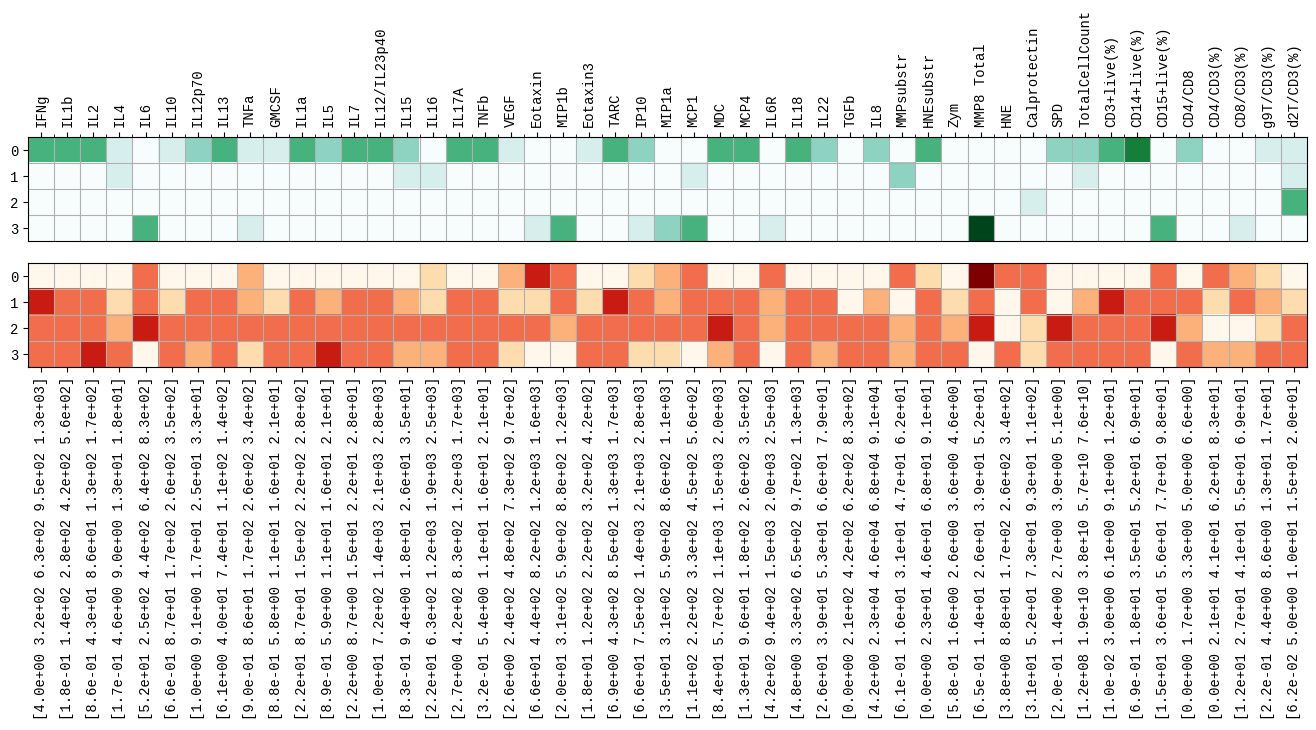

In [ ]:
tm_clause_display(tm_max, x_shape = 4, y_shape = 49, polarity = 0, y = 1, bn_range = bn_range)

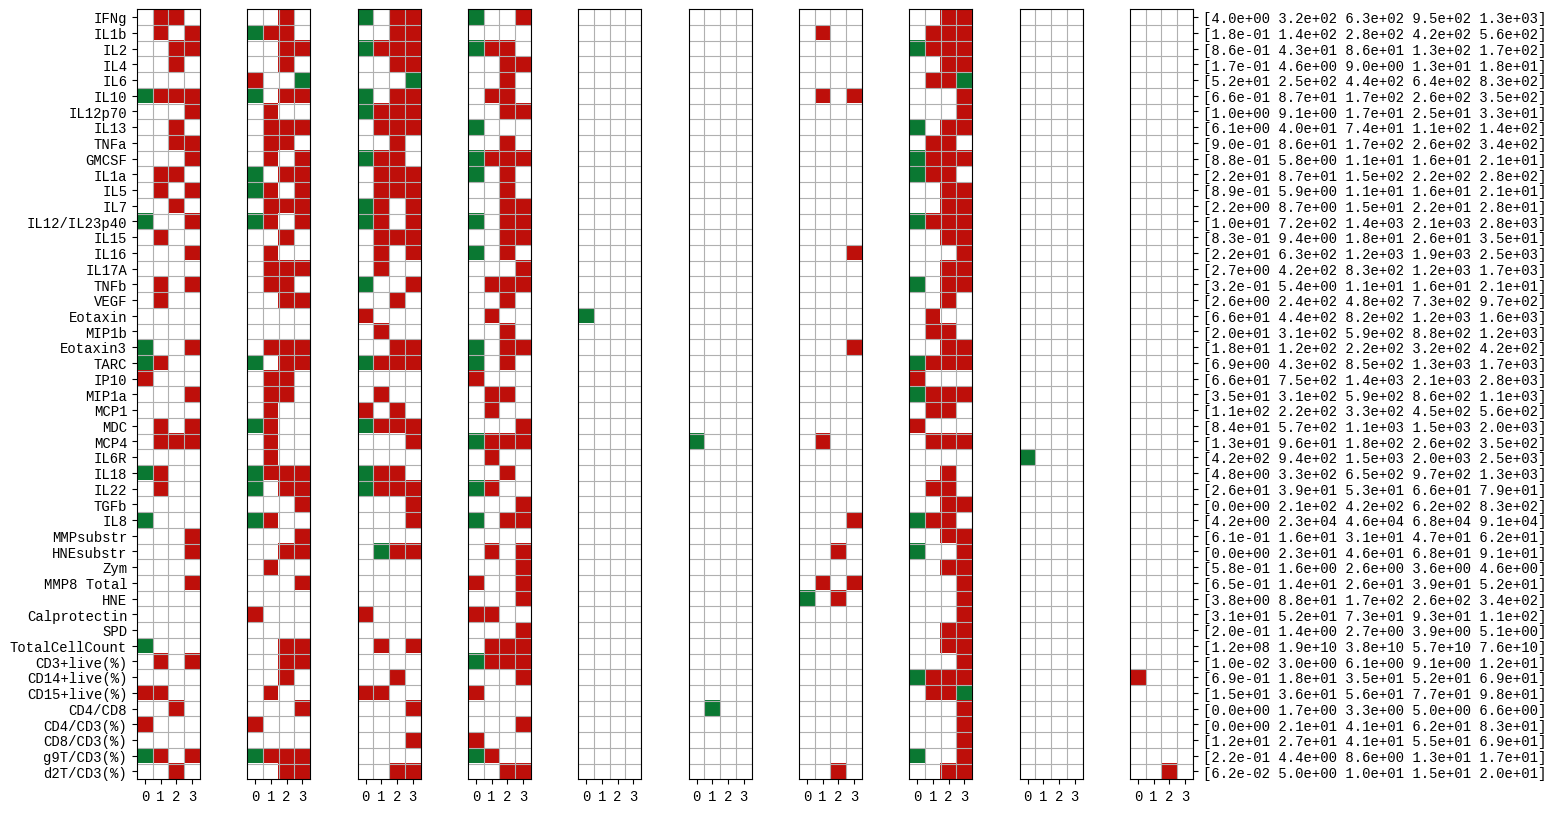

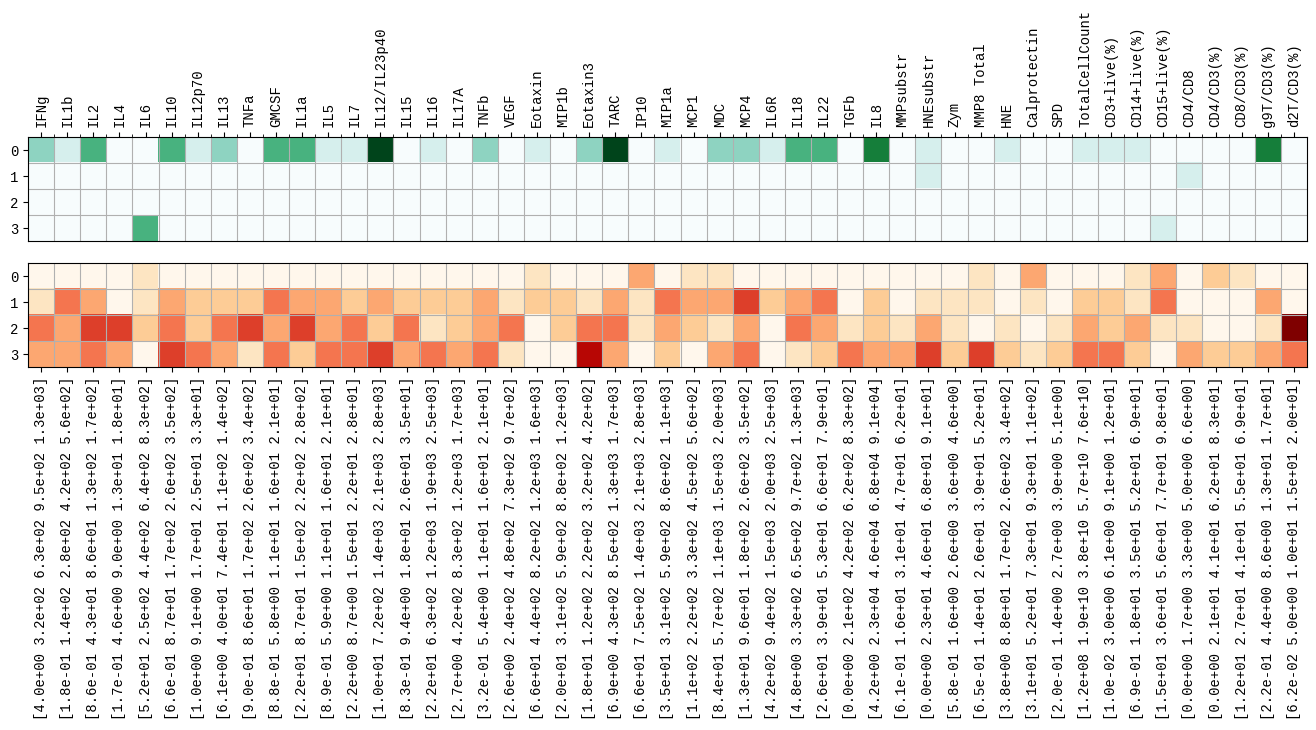

In [ ]:
tm_clause_display(tm_max, x_shape = 4, y_shape = 49, polarity = 1, y = 1, bn_range = bn_range)

In [ ]:
print(np.array2string(np.array(bn.bins_list)[40], separator=' ', floatmode='fixed', precision=2))
print(np.array2string(np.array(bn.bins_list)[0], separator=' ', floatmode='fixed', precision=2))
print(np.array2string(np.array(bn.bins_list)[0], separator=' ', floatmode='maxprec_equal', precision=2))
print(np.array2string(np.array(bn.bins_list)[0], separator=' ', precision=2, formatter={'complexfloat': lambda x: x}))
print(np.array2string(np.array(bn.bins_list)[0], separator=' ', precision=2, formatter={'float_kind': '{:0.2e}'.format}))
print(np.array2string(np.array(bn.bins_list)[0], separator=' ', precision=2, floatmode='fixed', formatter={'complexfloat':lambda x: ":12.2f" }))

[1.20e+08 1.91e+10 3.81e+10 5.70e+10 7.60e+10]
[   4.01  318.01  632.00  946.00 1260.00]
[   4.01  318.01  632.00  946.00 1260.00]
[   4.01  318.01  632.    946.   1260.  ]
[4.0e+00 3.2e+02 6.3e+02 9.5e+02 1.3e+03]
[   4.01  318.01  632.00  946.00 1260.00]


# Two layer TM

In [ ]:
tm1 = tm

In [ ]:
#evaluate TM-1 training and validation accuracy
acc_train_1 = 100*(tm1.predict(X_train) == Y_train).mean()
acc_val_1 = 100*(tm1.predict(X_test) == Y_test).mean()
print('TM-1 training accuracy (100 training epochs):   ', acc_train_1)
print('TM-1 validation accuracy (100 training epochs): ', acc_val_1)

TM-1 training accuracy (100 training epochs):    100.0
TM-1 validation accuracy (100 training epochs):  100.0


In [ ]:
#create TM-2
tm2 = MultiClassTsetlinMachine(20, 3, 5)
#tune TM-2 using as an input TM-1 clause outputs
#tm.transform method returns raw TM clause outputs corresponding to the input dataset
tm2.fit(tm1.transform(X_train), Y_train, epochs=2000)

#evaluate TM-2 training and validation accuracy; notice how is the input defined
acc_train_2 = 100*(tm2.predict(tm1.transform(X_train)) == Y_train).mean()
acc_val_2 = 100*(tm2.predict(tm1.transform(X_test)) == Y_test).mean()
print('TM-2 training accuracy (100 tuning epochs):   ', acc_train_2)
print('TM-2 validation accuracy (100 tuning epochs): ', acc_val_2)

TM-2 training accuracy (100 tuning epochs):    98.48484848484848
TM-2 validation accuracy (100 tuning epochs):  47.05882352941176


# 3-fold stratified cross-validation

In [ ]:
# 3-fold stratified cross-validation
tm_val_results = np.empty(0)
tm_train_results = np.empty(0)

skf = StratifiedKFold(n_splits=5)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y)
# print(X_tr.shape)

i = 0
for   train, val in skf.split(X_train, Y_train):
  print(Y_train[train].shape, Y_train[val].shape, 'train -  {}   |   val -  {}'.format(np.bincount(Y_train[train]), np.bincount(Y_train[val])))
  tm.fit(X_train[train], Y_train[train], epochs=1000, incremental=False)
  y_train_predict = tm.predict(X_train[train])
  y_val_predict = tm.predict(X_train[val])
  tm_train_results = np.append(tm_train_results, np.array(100*(y_train_predict == Y_train[train]).mean()))
  tm_val_results = np.append(tm_val_results, np.array(100*(y_val_predict == Y_train[val]).mean()))
  print("#%d Train Accuracy (max/mean): %.2f%% / %.2f%% +/- %.2f" % (i+1, tm_train_results.max(), tm_train_results.mean(), 1.96*tm_train_results.std()/np.sqrt(i+1)))
  print("#%d Val Accuracy (max/mean): %.2f%% / %.2f%% +/- %.2f" % (i+1, tm_val_results.max(), tm_val_results.mean(), 1.96*tm_val_results.std()/np.sqrt(i+1)))
  i = i + 1
  result = np.round(confusion_matrix(Y_train[val], y_val_predict), 2) #normalize='pred'
  df_cm = pd.DataFrame(result, index=range(0, result.shape[0]), columns=range(0, result.shape[1]))
  cmap = 'Oranges'

tm.fit(X_train, Y_train, epochs=1000, incremental=False)
y_train_predict = tm.predict(X_train)
y_test_predict = tm.predict(X_test)
print("Train Accuracy: ", 100*(y_train_predict == Y_train).mean())
print("Val Accuracy: ", 100*(y_test_predict == Y_test).mean())

#  pp_matrix(df_cm, cmap = cmap)




(120,) (31,) train -  [12 12 15 13 15 13 13 15 12]   |   val -  [3 4 4 4 3 3 4 3 3]
#1 Train Accuracy (max/mean): 99.17% / 99.17% +/- 0.00
#1 Val Accuracy (max/mean): 77.42% / 77.42% +/- 0.00
(121,) (30,) train -  [12 13 16 14 14 13 13 14 12]   |   val -  [3 3 3 3 4 3 4 4 3]
#2 Train Accuracy (max/mean): 99.17% / 99.17% +/- 0.00
#2 Val Accuracy (max/mean): 83.33% / 80.38% +/- 4.10
(121,) (30,) train -  [12 13 15 14 14 13 14 14 12]   |   val -  [3 3 4 3 4 3 3 4 3]
#3 Train Accuracy (max/mean): 99.17% / 98.34% +/- 1.32
#3 Val Accuracy (max/mean): 83.33% / 76.92% +/- 6.17
(121,) (30,) train -  [12 13 15 14 14 13 14 14 12]   |   val -  [3 3 4 3 4 3 3 4 3]
#4 Train Accuracy (max/mean): 100.00% / 98.76% +/- 1.21
#4 Val Accuracy (max/mean): 83.33% / 76.85% +/- 4.63
(121,) (30,) train -  [12 13 15 13 15 12 14 15 12]   |   val -  [3 3 4 4 3 4 3 3 3]
#5 Train Accuracy (max/mean): 100.00% / 98.18% +/- 1.40
#5 Val Accuracy (max/mean): 83.33% / 76.82% +/- 3.71
Train Accuracy:  99.33774834437085
Val

In [ ]:
tm_test_results = np.empty(0)
tm_train_results = np.empty(0)

# for i in range(100):
# 	tm.fit(X_train, Y_train, epochs=1)
# 	tm_results = np.append(tm_results, np.array(100*(tm.predict(X_test) == Y_test).mean()))
# 	print("#%d Average Accuracy: %.2f%% +/- %.2f" % (i+1, tm_results.mean(), 1.96*tm_results.std()/np.sqrt(i+1)))

for i in range(1):
  for j in range(1000):
    tm.fit(X_train, Y_train, epochs=1, incremental=True)
    tm_train_results = np.append(tm_train_results, np.array(100*(tm.predict(X_train) == Y_train).mean()))
    tm_test_results = np.append(tm_test_results, np.array(100*(tm.predict(X_test) == Y_test).mean()))
  print("#%d Train Accuracy (max/mean): %.2f%% / %.2f%% +/- %.2f" % (i+1, tm_train_results.max(), tm_train_results.mean(), 1.96*tm_train_results.std()/np.sqrt(i+1)))
  print("#%d Test Accuracy (max/mean): %.2f%% / %.2f%% +/- %.2f" % (i+1, tm_test_results.max(), tm_test_results.mean(), 1.96*tm_test_results.std()/np.sqrt(i+1)))

#1 Train Accuracy (max/mean): 100.00% / 98.74% +/- 12.55
#1 Test Accuracy (max/mean): 29.41% / 12.27% +/- 4.00


In [ ]:
tm = MultiClassTsetlinMachine(20, 3, 1.5)

In [ ]:
print("\nMean accuracy over 100 runs:\n")
tm_results = np.empty(0)

# for i in range(100):
# 	tm.fit(X_train, Y_train, epochs=1)
# 	tm_results = np.append(tm_results, np.array(100*(tm.predict(X_test) == Y_test).mean()))
# 	print("#%d Average Accuracy: %.2f%% +/- %.2f" % (i+1, tm_results.mean(), 1.96*tm_results.std()/np.sqrt(i+1)))

for i in range(10):
  tm.fit(X_train, Y_train, epochs=100, incremental=True)
  tm_results = np.append(tm_results, np.array(100*(tm.predict(X_test) == Y_test).mean()))
  print("#%d Average Accuracy: %.2f%% +/- %.2f" % (i+1, tm_results.mean(), 1.96*tm_results.std()/np.sqrt(i+1)))


Mean accuracy over 100 runs:

#1 Average Accuracy: 89.47% +/- 0.00
#2 Average Accuracy: 90.35% +/- 1.22
#3 Average Accuracy: 90.64% +/- 0.94
#4 Average Accuracy: 90.79% +/- 0.74
#5 Average Accuracy: 90.88% +/- 0.62
#6 Average Accuracy: 90.94% +/- 0.52
#7 Average Accuracy: 91.35% +/- 0.88
#8 Average Accuracy: 91.34% +/- 0.77
#9 Average Accuracy: 91.62% +/- 0.86
#10 Average Accuracy: 91.58% +/- 0.78


In [ ]:
np.linspace(X[:,0].min(), X[:,0].max(), 3)[1:-1]

array([17.5455])

In [ ]:
print(b.number_of_features)
b.bins_list

30


[array([17.5455]),
 array([24.495]),
 array([116.145]),
 array([1322.25]),
 array([0.108015]),
 array([0.18239]),
 array([0.2134]),
 array([0.1006]),
 array([0.205]),
 array([0.0737]),
 array([1.49225]),
 array([2.6226]),
 array([11.3685]),
 array([274.501]),
 array([0.0164215]),
 array([0.068826]),
 array([0.198]),
 array([0.026395]),
 array([0.043416]),
 array([0.0153674]),
 array([21.985]),
 array([30.78]),
 array([150.805]),
 array([2219.6]),
 array([0.146885]),
 array([0.542645]),
 array([0.626]),
 array([0.1455]),
 array([0.41015]),
 array([0.13127])]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
# Output vector categorization
X_ann = np.loadtxt('bmarkers_x_prep.csv', delimiter=',')
Y_ann = np.loadtxt('bmarkers_y.csv', delimiter=',').astype(int)
# bmarkers_y.csv bmarkers_y_nogrowth.csv bmarkers_y_nogrnegpos.csv bmarkers_y_nogrnegstrnonstr.csv
# bmarkers_y_neg.csv bmarkers_y_pos.csv bmarkers_y_posstr.csv bmarkers_y_posnstr.csv

x_train, x_test, y_train, y_test = train_test_split(X_ann, Y_ann, test_size=0.2, random_state=41, stratify = Y)

ros = RandomOverSampler()
x_train, y_train = ros.fit_resample(x_train, y_train)

y_train = utils.to_categorical(y_train, 9)
y_test = utils.to_categorical(y_test, 9)

# X_tr, X_te, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# print(X_tr.shape)

i = 0
#for   train, test in skf.split(X_ann, Y):

# ANN creation: 1 hidden layer, 1000 neurons
model = Sequential()
model.add(Dense(20, input_dim=49, activation="relu"))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer = 'SGD', loss = 'binary_crossentropy',   metrics = ['accuracy']) #adam
model.add(Dense(9, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

# ANN training
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=1, epochs=100, verbose=0)
# ANN testing
train_acc = model.evaluate(x_train, y_train)
test_acc = model.evaluate(x_test, y_test)
print(train_acc, test_acc)


1/1 [==============================] - 0s 38ms/step - loss: 6.0319 - accuracy: 0.2941
[0.008010460995137691, 1.0] [6.0319013595581055, 0.29411765933036804]


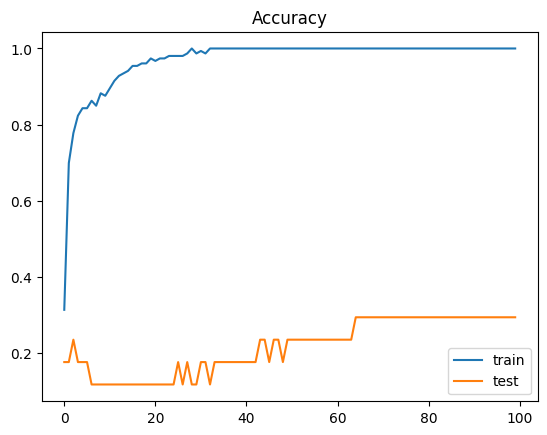

In [ ]:
from matplotlib import pyplot
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print(classification_report(y_test, utils.to_categorical(np.argmax(model.predict(x_test), axis=-1),9)))

1/1 [==============================] - 0s 69ms/step
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.40      0.67      0.50         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.12      0.50      0.20         2
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0

   micro avg       0.29      0.29      0.29        17
   macro avg       0.22      0.27      0.23        17
weighted avg       0.26      0.29      0.25        17
 samples avg       0.29      0.29      0.29        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
